- 미분 :
- 분산 : (sigma(관측치 -평균)^2)/n-1
- 표준편차 : root(sigma(관측치-평균)^2/n-1)
- 공분산 : sigma(x-xbar)(y-ybar)/n-1
- 상관계수 : (sigma(x-xbar)(y-ybar)/n-1)/(xsigma*ysigma): -1~1
- 벡터 거리값 : 각 요소의 차의 제곱을 루트로 구함
- model 평가: MSE(mean square error): 연속된 수치인 경우의 평가 , RMSE(root)
- 신경망에서 cost function 비용함수 : (예측치 - 관측치) --> back propagation (역전파를 통해서 가중치를 수정)

# 국어, 수학, 점수 vector
- 상관계수가 1이다 국어 점수가 높을 수록 수학점수가 낮다 
- 내적1 이다 --> 상관계수가 1이다. 
- 그런데 내적 구하는게 상관계수 구하는것보다 쉽다 그래서 내적을 구한다. 


# 회귀분석, 상관분석

- 회귀분석 다중공선성이(독립변수간의 영향) 있다면 종속변수가 과하게 영향을 받을 수 있음
- 회귀분석 자기상관성(Autocorelation)이 존재: 시계열 분석을 해야한다. 
- 시계열 분석에서 가장 기초 : ARMA (Autocorelation + Moving Average) 자기상관성 오늘의 영향이 내일까지 미치는것
    - 정산성을 뛴 데이터에만 가능
    - 이동평균법 (주파수를 줄여줌 => 복잡하면 분석이 불가능하다.)
    - 그러나 정상성을 뛴 데이터가 없다 따라서 비정상성을 정상성으로 바꾸어 줘야한다
-그래서 나온게 ARIMA(Intergrated 통합 => 비정상성을 뛴 데이터에도 가능)

- pandas 는 시계열 분석을 지원( 시간 index를 지원 )


In [1]:
import numpy as np
from statistics import *
x = np.array([7,8,9])
y = np.array([9,10,20])
print(y.mean())     # 통계에서는 mean 대신에 중위수(medians)  # 중위수는 이상치에 영향을 받지 않는다. 
# 공 분산 행렬 
print('공분산',np.cov(x))
# 상관계수 행렬 (열2, 행2:4)
print('상관계수', np.corrcoef(x,y))

13.0
공분산 1.0
상관계수 [[1.         0.90419443]
 [0.90419443 1.        ]]


In [2]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('원본', arr)
print('누적합 (행)= ',arr.cumsum(0))
print('누적곱 (열)=', arr.cumprod(1))
print('배열의 합계 = ', arr.sum())
print('열방향으로의 합계(행평균)= ', arr.mean(axis=1))   # 결국에는 행 합계
print('행방으로의 합계 = ', arr.sum(axis = 0))        # 결국에는 열 합계

원본 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합 (행)=  [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱 (열)= [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계 =  45
열방향으로의 합계(행평균)=  [2. 5. 8.]
행방으로의 합계 =  [12 15 18]


In [3]:
# 가중치 (변수의 중요도를 부여)
a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])     # a 에서 1에는 4의 중요성 2에다 3의 중요성 3에서 2의 중요성 4에서 1의 중요성을 매긴다
print(np.average(a,weights = wts))
std = np.sqrt(np.mean(abs(a-a.mean())**2))         # 표준편차를 구하는식. 
print(np.var([1,2,3,4]))                   # 분산을 구한다
print(np.std([1,2,3,4]))                        # 표준편차를 구한다. 

2.0
1.25
1.118033988749895


In [4]:
# matplotlib, seaborn, pandas. plot
- 기본이 matplotlib로 구성되어 있다
- 아나콘다에서는 %matplotlib inline을 사용해야 출력이 가능하다. 


SyntaxError: invalid syntax (<ipython-input-4-4aad5ce63f3b>, line 2)

data1:mean = 100.004 stdv = 19.831
data2:mean = 149.965 stdv = 22.206


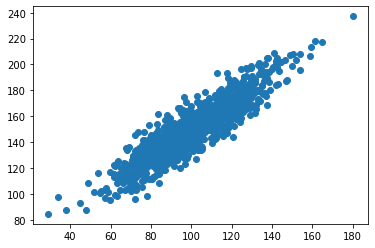

In [5]:
# matplotlib, seaborn, pandas. plot

%matplotlib inline
from numpy import mean           # 전부다 호출하지 않고 메모리 낭비를 줄일수 있음
from numpy import std             
from numpy.random import randn      # 넘파이의 랜덤이라는 서브 패키지 : linalg, random,/ fft(푸리에 변환), poly (다차방정식)
from numpy.random import seed       #randon :의사 난수(데이터 출력 순서 정해짐)   # / 뒤로는 사이파이가 더 훌륭하다
from matplotlib import pyplot             
seed(300)      # seed가 들어가면 같은수가 발생함 
data1 = 20*randn(1000) +100          # 정규분포에서 1000개를 발생시켜라 
data2 = data1 + (10* randn(1000)+ 50)
print('data1:mean = %.3f stdv = %.3f' % (mean(data1), std(data1)))    # 평균과 표준편차 출력. 
print('data2:mean = %.3f stdv = %.3f' % (mean(data2), std(data2)))
pyplot.scatter (data1, data2)
pyplot.show()            # 반드시 show를 호출해야한다. 

In [6]:
import matplotlib.pyplot as plt
print(plt.style.available)    # 스타일에 따라그래프가 출력되는 형태가 다르다


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


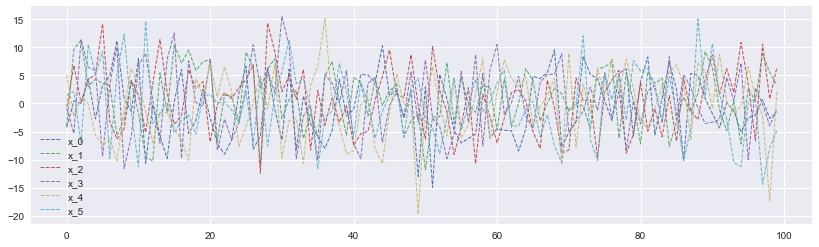

In [7]:
plt.style.use(['seaborn'])
xs = np.random. normal(0,6,(100,6))   # 평균 = 0, 표준편차:3 100*3 데이터 생성
plt.figure(figsize= (14,4))         # 모양을 결정
for i in range(0,6):
    x = xs[:, i]
    plt.plot(range(0, len(x)), x, linewidth = 1, linestyle = '--', label = 'x_{}'.format(i))
plt.legend()        #범례 
plt.grid(True)
plt.show()

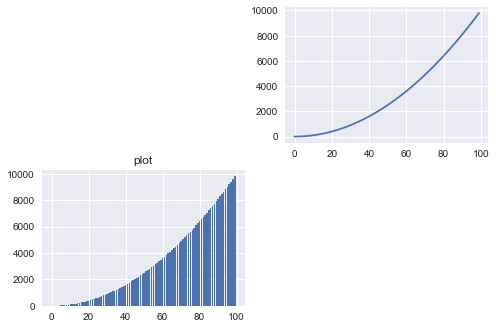

In [8]:
# 화면을 분활하기

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)   # 2행 1렬중에 첫번째 놈이 첫번째에 출력되고 
ax2 = fig.add_subplot(2,2,3)      # 2행 1렬중에 첫번째 높이 두번째에 출력

x = range(0,100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)
plt.title('plot')
plt.show()

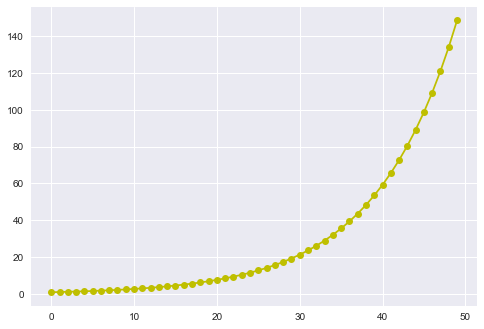

In [9]:
x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,2.0)

plt.plot(np.exp(x1), 'yo-') # 지수함수의 그래프
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


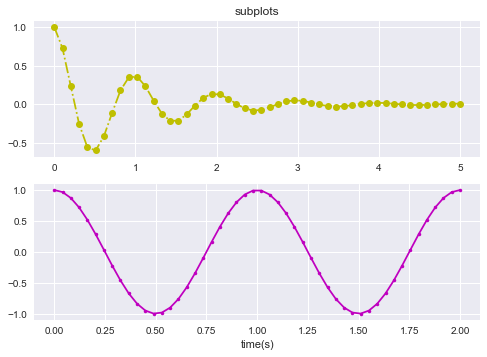

In [10]:
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
y2 = np.cos(2*np.pi*x2)

ax1 = plt.subplot(2,1,1)
plt.plot(x1,y1,'yo-.')       # yellow, point marking linetype
plt.title('subplots')
print(ax1)
ax2 = plt.subplot(2,1,2)
plt.plot(x2,y2,'m.-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

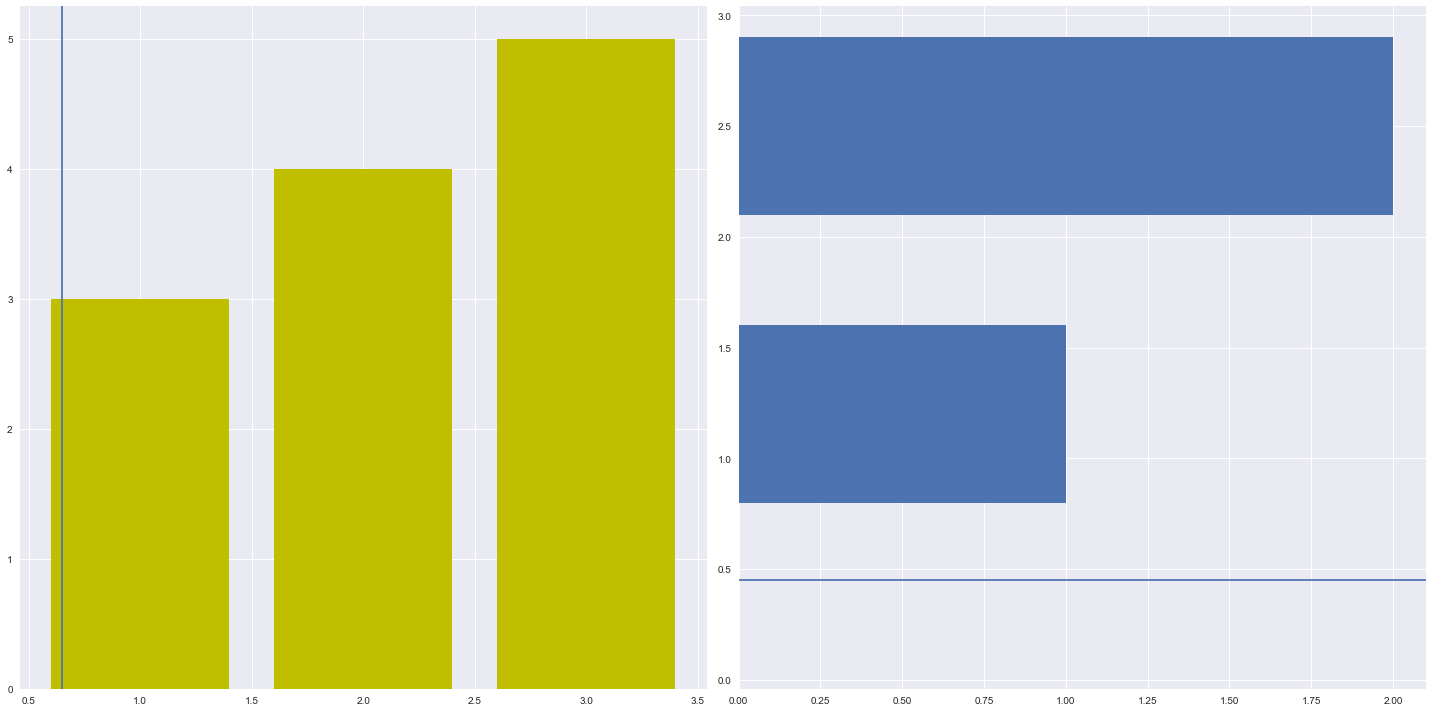

In [11]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 이산형 막대그래프  bar
# 연속형 막대 그래프 histogran
ax1.bar([1,2,3],[3,4,5], color = 'y')
ax2.barh([0.5,1.2,2.5], [0,1,2])

ax1.axvline(0.65)
ax2.axhline(0.45)
plt.tight_layout() # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b803a59ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b803a5afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b803a595c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b803a61f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b803a61f08>],
 'means': []}

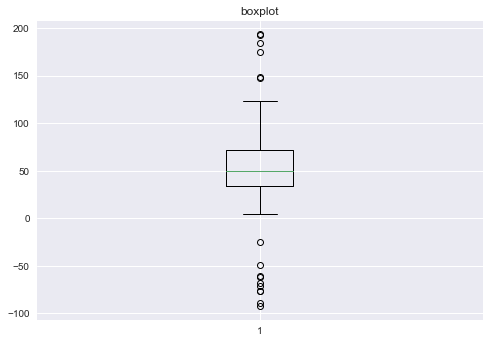

In [12]:
# boxplot
# IQR (inter quantile range = 3 사분위수 - 1사분위수 )
# IQR * +- 1.5 = 상하한선 
np.random.seed(19680801)
spread = np.random.rand(50)*100              # 분포데이터 
center = np.ones(25)*50        # 중심데이터 
filter_high = np.random.rand(10)*100 +100         # 상한선을 넘는 데이터
filter_low = np.random.rand(10)*-100                   # 하한선을 넘는 데이타
data = np.concatenate((spread,center,filter_high,filter_low))          # 데이터를 병합해라
fig1,ax1 = plt.subplots()         # 형태를 제어, 도화지
ax1.set_title('boxplot')               # 도화지에다가 타이틀을 찍고
ax1.boxplot(data)                          # 도화지에다가 박스 프롯 그림을 그림 

{'whiskers': [<matplotlib.lines.Line2D at 0x1b803ac4c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b803e6fc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b803ac41c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b803a9aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b803acdc48>],
 'means': []}

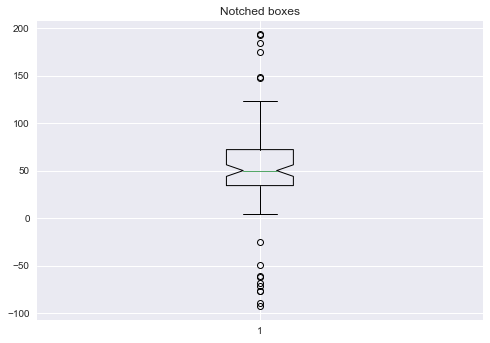

In [13]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes')    # 중간에 홈이 파진다 ==> 95% 신뢰구간의 범위 
ax2.boxplot(data,notch = True)


{'whiskers': [<matplotlib.lines.Line2D at 0x1b803b30f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1b803b33a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b803b30708>],
 'medians': [<matplotlib.lines.Line2D at 0x1b803b37f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b803b3d888>],
 'means': []}

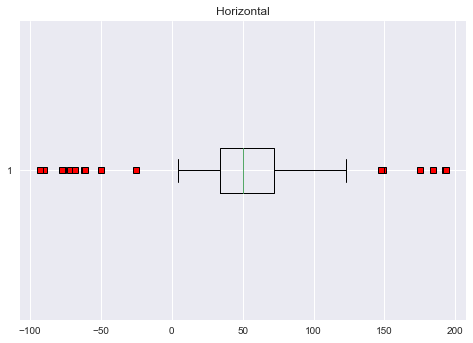

In [14]:
# vertical ,horizontal  수직의 수평의     
red_square = dict(markerfacecolor= 'r',marker = 's')      # 마커리 red와 square로 출력해라 
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal')     
ax5.boxplot(data, vert = False, flierprops = red_square) ## 이상치를 red_square로 표현해라.   #vert = False ==> 수평으로 해라

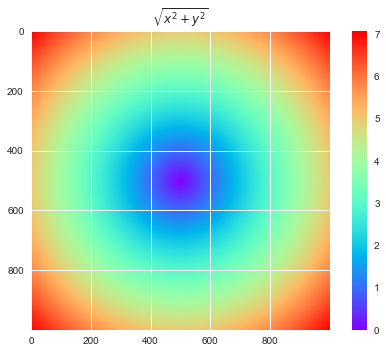

In [15]:
# meshgrid  # 그물망 격자 
# 그래프에 수식 latex 문법

points= np.arange(-5,5,0.01)        # 1000개 를 만들었엉
xs,ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)

plt.imshow(z, cmap = plt.cm.rainbow);  # 데이터를 이미지로 출력해라. # 애는 파레트임 
plt.colorbar()
plt.title('$\sqrt{x^2+y^2}$')      # 이게 바로 latex문법이다.  나중에 찾아서 하세요 
plt.show()

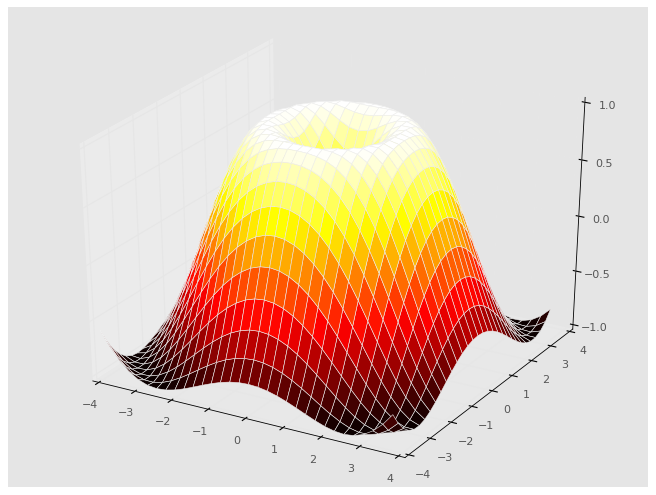

In [74]:
# 3차원 Axes3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = R
Z = np.sin(R)
ax.plot_surface(X,Y,Z, rstride =1 , cstride = 1, cmap = 'hot')
plt.show()
ax.plot_surface(X,Y,X, rstride =1 , cstride = 1, cmap = plt.cm.rainbow)
plt.show()

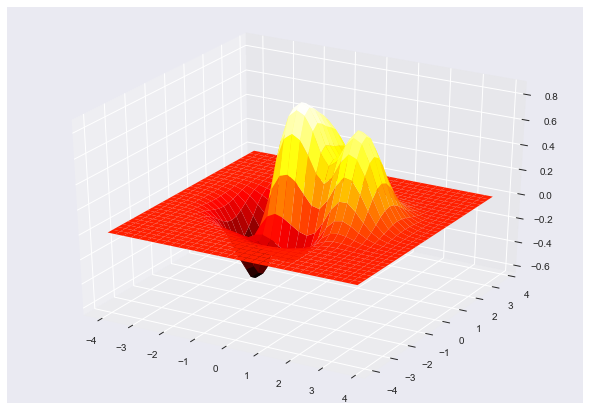

In [21]:
from mpl_toolkits.mplot3d import Axes3D
# 방정식 
def f(x,y): return (1-x/2+x**5+y**3)* np.exp(-x**2-y**2)
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
Z = np.sin(f(X,Y))

ax.plot_surface(X,Y,Z, rstride = 1,cstride = 1, cmap = 'hot' )
plt.show()

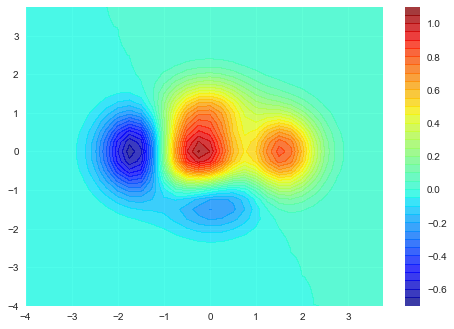

In [33]:
plt.contourf(X,Y,f(X,Y),40, alpha = .75, cmap = 'jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0]


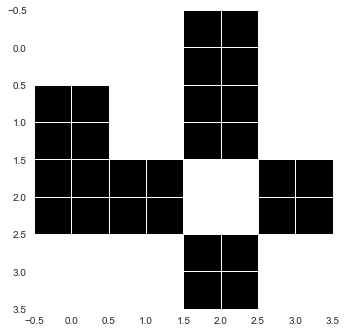

In [39]:
a = [0, 0, 1, 0,
     1, 0, 1, 0,
     1, 1, 0, 1, 
     0, 0, 1, 0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4), cmap = 'Greys', interpolation = 'nearest')# 보간법, 컬러값이 지정되지 않으면 보간해서 적용하라 
plt.show()

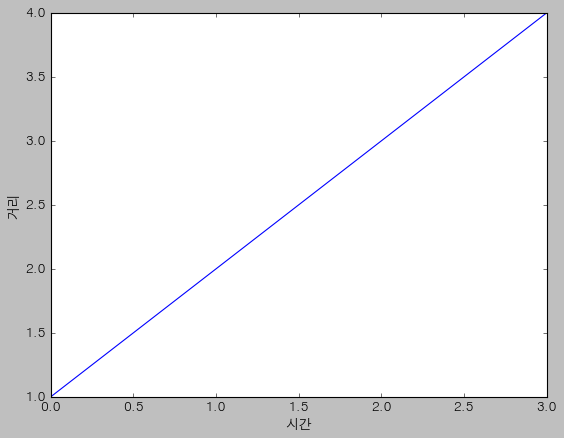

In [45]:
 # matplotlib에서는 불행하게도 한글을 지원하지 않는다. 
    
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'   # 윈도 모든 폰트가 있는 곳
font_name = font_manager.FontProperties(fname=font_path).get_name()   # 폰트 이름을 가져온다 . 
# rc = resource configuration  폰트이름
matplotlib.rc('font', family = font_name)    # 가져 font를 출력 한다. 
plt.plot([1,2,3,4])
plt.xlabel('시간')
plt.ylabel('거리')
plt.show()

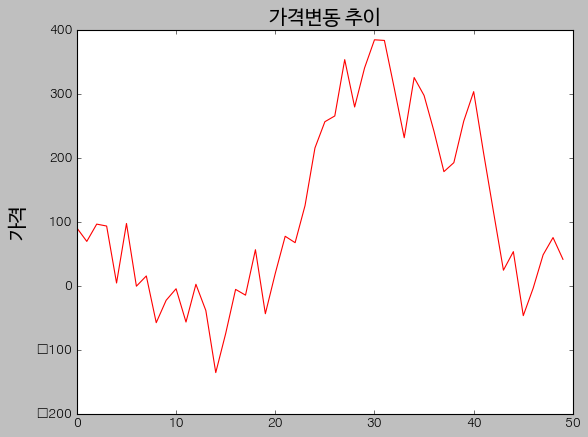

In [52]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname = path, size = 18)
data = np.random.randint(-100, 100, 50).cumsum()  # cumsum() # 누적 합계
data 
plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties = fontprop)
plt.ylabel('가격', fontproperties = fontprop)
plt.show()

Text(0, 0.5, 'f(x)')

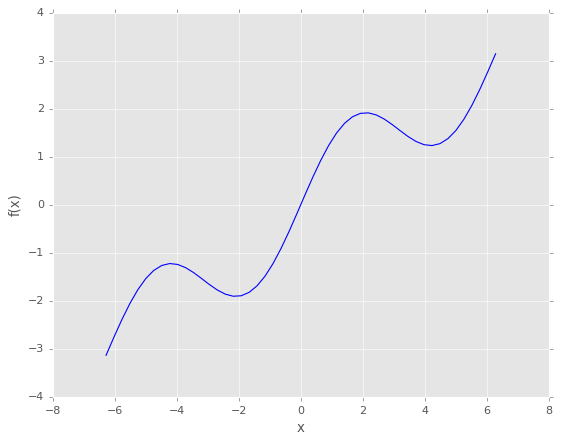

In [55]:

from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family']= '바탕'
def f(x):
    return np.sin(x) + 0.5*x  # 주기함수 
x = np.linspace(-2*np.pi, 2*np.pi,50)
plt.plot(x,f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

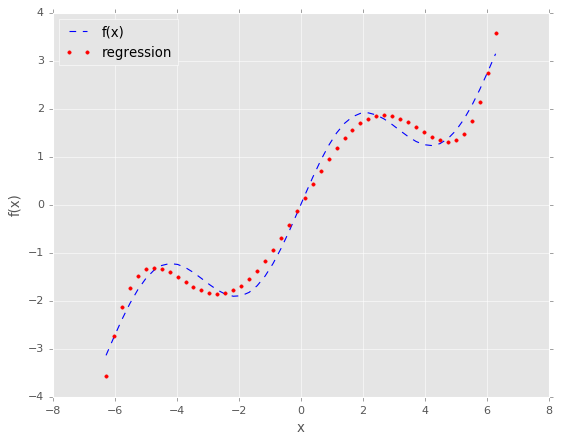

In [64]:
# 최소 제곱법을 이용해서 위의 그래프를 fitting ( 적합 해보자 )
#polyfit 다차 방정식으로 계수를 찾아 내는 것

reg = np.polyfit(x, f(x),deg=5)  # 최소 제곱법을 이용해서 다차방정식으로 fitting     5차방정식으로 피팅해라 .
ry = np.polyval(reg,x)        # 5차 방정식으로 회귀 

plt.plot(x, f(x), 'b--', label = 'f(x)')  # 원본 데이터 
plt.plot(x, ry, 'r.', label = 'regression')   #최소 제곱법으로 피팅된 데이터 

plt.legend(loc= 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [76]:
import folium
map_1 = folium.Map(location = [37.565711, 126.978090],
                  zoom_start = 16 ,       # 확대 축소
                 tiles = 'Stamen Terrain')
folium.Marker([37.565711, 126.978090], popup = '서울시청').add_to(map_1)
folium.Marker([37.565711, 123.978190], popup = '서울시청 밑', icon = folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [ ]:
# 숙제 : 서울 소재 10개 대학의 좌표를 출력해보시오 


     